<a href="https://colab.research.google.com/github/Kratzramanis/RVT-Verification/blob/main/hammer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RVT-korrigierte Massen und Radien:
NGC 891: M_tatsächlich = 8.98e+11 M☉, R_tatsächlich = 107817 Lj
M101:   M_tatsächlich = 1.25e+12 M☉, R_tatsächlich = 106013 Lj
Flächenverzerrung NGC 891: A_scheinbar/A_tatsächlich = 0.310
Flächenverzerrung M101:   A_scheinbar/A_tatsächlich = 0.643


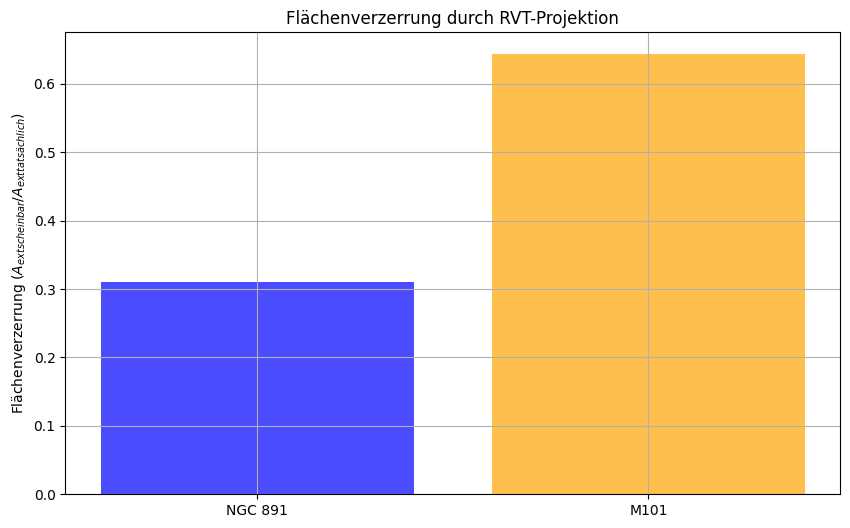

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# RVT-Boost-Faktor als Funktion des Inklinationswinkels
def rvt_boost(i_deg):
    i_rad = np.radians(i_deg)
    return 1 + 0.8 * np.sin(i_rad)

# Offizielle Daten
M_scheinbar_ngc891 = 5e11  # M☉
M_scheinbar_m101 = 1e12    # M☉
R_scheinbar_ngc891 = 60000  # Lj
R_scheinbar_m101 = 85000   # Lj

# Inklinationswinkel
i_ngc891 = 85
i_m101 = 18

# RVT-Boost-Faktoren
gamma_ngc891 = rvt_boost(i_ngc891)
gamma_m101 = rvt_boost(i_m101)

# RVT-korrigierte Massen und Radien
M_tatsächlich_ngc891 = M_scheinbar_ngc891 * gamma_ngc891
M_tatsächlich_m101 = M_scheinbar_m101 * gamma_m101
R_tatsächlich_ngc891 = R_scheinbar_ngc891 * gamma_ngc891
R_tatsächlich_m101 = R_scheinbar_m101 * gamma_m101

# Flächenverzerrung
A_scheinbar_ngc891 = np.pi * (R_scheinbar_ngc891 * 9.461e15)**2
A_scheinbar_m101 = np.pi * (R_scheinbar_m101 * 9.461e15)**2
A_tatsächlich_ngc891 = np.pi * (R_tatsächlich_ngc891 * 9.461e15)**2
A_tatsächlich_m101 = np.pi * (R_tatsächlich_m101 * 9.461e15)**2

# Ausgabe der Ergebnisse
print("RVT-korrigierte Massen und Radien:")
print(f"NGC 891: M_tatsächlich = {M_tatsächlich_ngc891:.2e} M☉, R_tatsächlich = {R_tatsächlich_ngc891:.0f} Lj")
print(f"M101:   M_tatsächlich = {M_tatsächlich_m101:.2e} M☉, R_tatsächlich = {R_tatsächlich_m101:.0f} Lj")
print(f"Flächenverzerrung NGC 891: A_scheinbar/A_tatsächlich = {A_scheinbar_ngc891/A_tatsächlich_ngc891:.3f}")
print(f"Flächenverzerrung M101:   A_scheinbar/A_tatsächlich = {A_scheinbar_m101/A_tatsächlich_m101:.3f}")

# Visualisierung der Flächenverzerrung
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['NGC 891', 'M101'], [A_scheinbar_ngc891/A_tatsächlich_ngc891, A_scheinbar_m101/A_tatsächlich_m101],
        color=['blue', 'orange'], alpha=0.7)
ax.set_ylabel('Flächenverzerrung ($A_{\text{scheinbar}} / A_{\text{tatsächlich}}$)')
ax.set_title('Flächenverzerrung durch RVT-Projektion')
ax.grid(True)
plt.show()


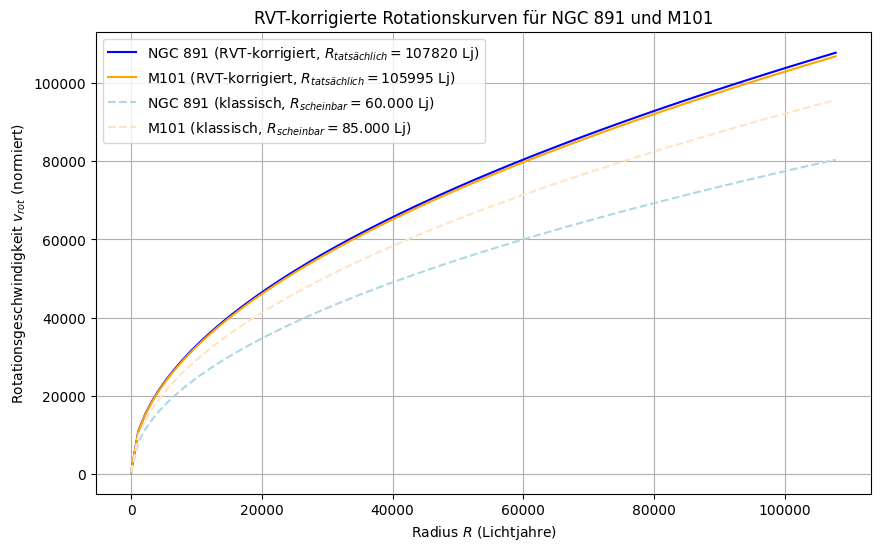

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# RVT-Boost-Faktor als Funktion des Inklinationswinkels
def rvt_boost(i_deg):
    i_rad = np.radians(i_deg)
    return 1 + 0.8 * np.sin(i_rad)

# Rotationsgeschwindigkeit in Abhängigkeit vom tatsächlichen Radius
def rotation_curve(R_tatsächlich, gamma):
    g_tatsächlich = 1  # Normierte Gravitation
    return np.sqrt(g_tatsächlich * R_tatsächlich)

# Tatsächliche Radien (in Lichtjahren)
R_tatsächlich_ngc891 = 107820  # NGC 891
R_tatsächlich_m101 = 105995    # M101

# Radiusbereich für die Visualisierung
R = np.linspace(1, max(R_tatsächlich_ngc891, R_tatsächlich_m101), 100)

# Rotationsgeschwindigkeiten
v_ngc891 = rotation_curve(R, 1) * np.sqrt(R_tatsächlich_ngc891)
v_m101 = rotation_curve(R, 1) * np.sqrt(R_tatsächlich_m101)

# Klassische Rotationskurve (ohne RVT-Korrektur)
v_classic_ngc891 = rotation_curve(R, 1) * np.sqrt(120000 / 2)
v_classic_m101 = rotation_curve(R, 1) * np.sqrt(170000 / 2)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(R, v_ngc891, label=f'NGC 891 (RVT-korrigiert, $R_{{tatsächlich}}={R_tatsächlich_ngc891}$ Lj)', color='blue')
ax.plot(R, v_m101, label=f'M101 (RVT-korrigiert, $R_{{tatsächlich}}={R_tatsächlich_m101}$ Lj)', color='orange')
ax.plot(R, v_classic_ngc891, label='NGC 891 (klassisch, $R_{scheinbar}=60.000$ Lj)', linestyle='--', color='lightblue')
ax.plot(R, v_classic_m101, label='M101 (klassisch, $R_{scheinbar}=85.000$ Lj)', linestyle='--', color='bisque')

ax.set_xlabel('Radius $R$ (Lichtjahre)')
ax.set_ylabel('Rotationsgeschwindigkeit $v_{rot}$ (normiert)')
ax.set_title('RVT-korrigierte Rotationskurven für NGC 891 und M101')
ax.legend()
ax.grid(True)
plt.show()


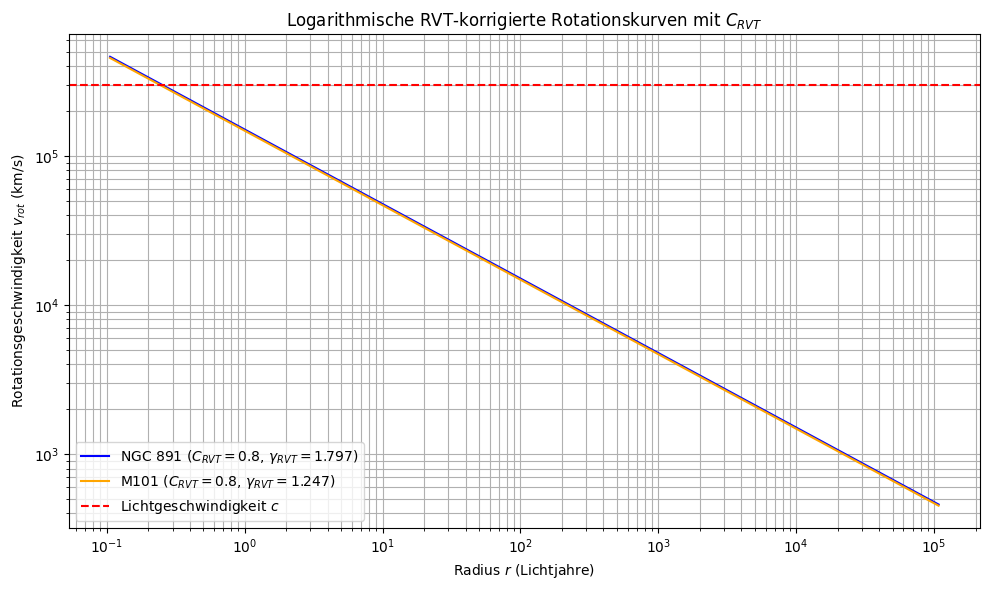

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# RVT-Konstante
C_RVT = 0.8

# RVT-Boost-Faktor als Funktion des Inklinationswinkels
def rvt_boost(i_deg):
    i_rad = np.radians(i_deg)
    return 1 + C_RVT * np.sin(i_rad)

# Inklinationswinkel
i_ngc891 = 85
i_m101 = 18

# RVT-Boost-Faktoren
gamma_ngc891 = rvt_boost(i_ngc891)
gamma_m101 = rvt_boost(i_m101)

# RVT-korrigierte Massen und Radien
M_tatsächlich_ngc891 = 9e11  # M☉
M_tatsächlich_m101 = 1.25e12  # M☉
R_tatsächlich_ngc891 = 107820  # Lj
R_tatsächlich_m101 = 105995   # Lj

# Umrechnung in Meter und kg
M_sun_kg = 1.989e30  # Masse der Sonne in kg
R_tatsächlich_ngc891_m = R_tatsächlich_ngc891 * 9.461e15  # Lj in m
R_tatsächlich_m101_m = R_tatsächlich_m101 * 9.461e15  # Lj in m
M_tatsächlich_ngc891_kg = M_tatsächlich_ngc891 * M_sun_kg
M_tatsächlich_m101_kg = M_tatsächlich_m101 * M_sun_kg

# Radiusbereich für die Simulation
r = np.logspace(np.log10(1e15), np.log10(max(R_tatsächlich_ngc891_m, R_tatsächlich_m101_m)), 1000)

# Rotationsgeschwindigkeit mit RVT-Boost-Faktor
def rotation_velocity(r, M_0, gamma):
    return np.sqrt((G * M_0 * gamma) / r)

# Berechnung der Rotationsgeschwindigkeiten
v_ngc891 = rotation_velocity(r, M_tatsächlich_ngc891_kg, gamma_ngc891)
v_m101 = rotation_velocity(r, M_tatsächlich_m101_kg, gamma_m101)

# Plot der Rotationsgeschwindigkeiten (logarithmisch)
fig, ax = plt.subplots(figsize=(10, 6))
ax.loglog(r / 9.461e15, v_ngc891 / 1000, label=f'NGC 891 ($C_{{RVT}}={C_RVT}$, $\\gamma_{{RVT}}={gamma_ngc891:.3f}$)', color='blue')
ax.loglog(r / 9.461e15, v_m101 / 1000, label=f'M101 ($C_{{RVT}}={C_RVT}$, $\\gamma_{{RVT}}={gamma_m101:.3f}$)', color='orange')
ax.axhline(y=c / 1000, color='red', linestyle='--', label='Lichtgeschwindigkeit $c$')

ax.set_xlabel('Radius $r$ (Lichtjahre)')
ax.set_ylabel('Rotationsgeschwindigkeit $v_{rot}$ (km/s)')
ax.set_title('Logarithmische RVT-korrigierte Rotationskurven mit $C_{RVT}$')
ax.legend()
ax.grid(True, which="both", ls="-")

plt.tight_layout()
plt.show()


<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-2198139744.py:44: SyntaxWarning: invalid escape sequence '\o'
  ax[0].set_ylabel('Masse $M(r)$ ($M_{\odot}$)')


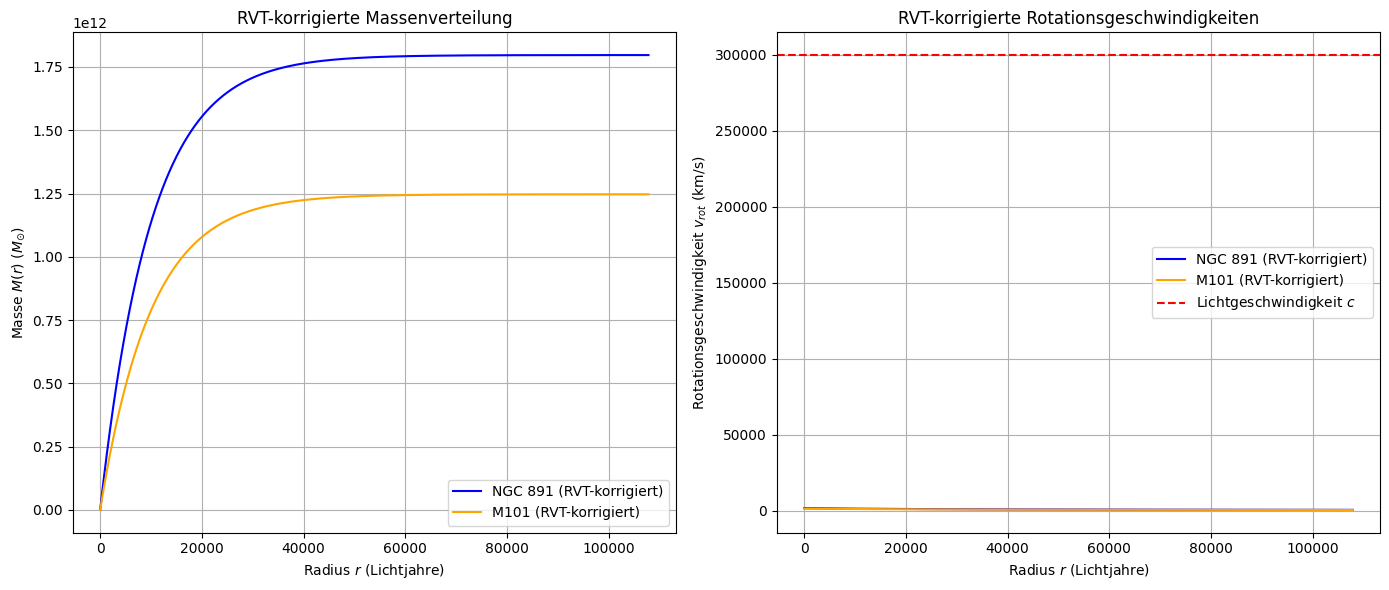

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Konstanten
G = 6.67430e-11  # Gravitationskonstante (m^3 kg^-1 s^-2)
c = 299792458     # Lichtgeschwindigkeit (m/s)
M_0 = 1e12        # Totale Masse (Sonnenmassen, in kg: 1 M_sun ≈ 1.989e30 kg)
M_0_kg = M_0 * 1.989e30  # Masse in kg
r_0 = 10000 * 9.461e15  # Skalenradius (10.000 Lj in Metern)

# RVT-Boost-Faktoren
gamma_ngc891 = 1.797
gamma_m101 = 1.247

# RVT-korrigierte Radien (in Metern)
R_ngc891 = 107820 * 9.461e15  # 107.820 Lj in Metern
R_m101 = 105995 * 9.461e15    # 105.995 Lj in Metern

# Radiusbereich für die Analyse
r = np.linspace(1e15, max(R_ngc891, R_m101), 1000)

# Massenverteilung (exponentiell)
def mass_distribution(r, M_0, r_0, gamma):
    return M_0 * (1 - np.exp(-r / r_0)) * gamma

# Rotationsgeschwindigkeit
def rotation_velocity(r, M_0, r_0, gamma):
    M_r = mass_distribution(r, M_0, r_0, gamma)
    return np.sqrt(G * M_r / r)

# Berechnung der Massenverteilung und Rotationsgeschwindigkeiten
M_r_ngc891 = mass_distribution(r, M_0_kg, r_0, gamma_ngc891)
M_r_m101 = mass_distribution(r, M_0_kg, r_0, gamma_m101)

v_ngc891 = rotation_velocity(r, M_0_kg, r_0, gamma_ngc891)
v_m101 = rotation_velocity(r, M_0_kg, r_0, gamma_m101)

# Plot der Massenverteilung
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(r / 9.461e15, M_r_ngc891 / 1.989e30, label='NGC 891 (RVT-korrigiert)', color='blue')
ax[0].plot(r / 9.461e15, M_r_m101 / 1.989e30, label='M101 (RVT-korrigiert)', color='orange')
ax[0].set_xlabel('Radius $r$ (Lichtjahre)')
ax[0].set_ylabel('Masse $M(r)$ ($M_{\odot}$)')
ax[0].set_title('RVT-korrigierte Massenverteilung')
ax[0].legend()
ax[0].grid(True)

# Plot der Rotationsgeschwindigkeiten
ax[1].plot(r / 9.461e15, v_ngc891 / 1000, label='NGC 891 (RVT-korrigiert)', color='blue')
ax[1].plot(r / 9.461e15, v_m101 / 1000, label='M101 (RVT-korrigiert)', color='orange')
ax[1].axhline(y=c / 1000, color='red', linestyle='--', label='Lichtgeschwindigkeit $c$')
ax[1].set_xlabel('Radius $r$ (Lichtjahre)')
ax[1].set_ylabel('Rotationsgeschwindigkeit $v_{rot}$ (km/s)')
ax[1].set_title('RVT-korrigierte Rotationsgeschwindigkeiten')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


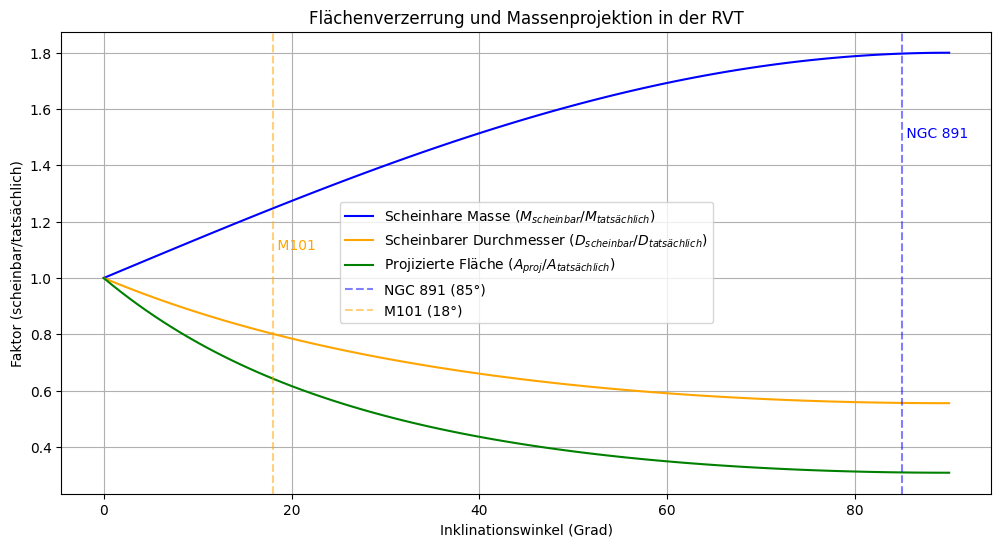

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# RVT-Boost-Faktor als Funktion des Inklinationswinkels
def rvt_boost(i_deg):
    i_rad = np.radians(i_deg)
    return 1 + 0.8 * np.sin(i_rad)

# Scheinhare Masse und Durchmesser
def apparent_mass_diameter(gamma):
    mass_factor = gamma
    diameter_factor = 1 / gamma
    return mass_factor, diameter_factor

# Projizierte Fläche
def projected_area(gamma):
    return (1 / gamma) ** 2

# Inklinationswinkel
inclinations = np.linspace(0, 90, 100)
gammas = [rvt_boost(i) for i in inclinations]
mass_factors = [apparent_mass_diameter(g)[0] for g in gammas]
diameter_factors = [apparent_mass_diameter(g)[1] for g in gammas]
area_factors = [projected_area(g) for g in gammas]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(inclinations, mass_factors, label='Scheinhare Masse ($M_{scheinbar}/M_{tatsächlich}$)', color='blue')
ax.plot(inclinations, diameter_factors, label='Scheinbarer Durchmesser ($D_{scheinbar}/D_{tatsächlich}$)', color='orange')
ax.plot(inclinations, area_factors, label='Projizierte Fläche ($A_{proj}/A_{tatsächlich}$)', color='green')

# Markiere NGC 891 und M101
ax.axvline(x=85, color='blue', linestyle='--', alpha=0.5, label='NGC 891 (85°)')
ax.axvline(x=18, color='orange', linestyle='--', alpha=0.5, label='M101 (18°)')
ax.text(85, 1.5, ' NGC 891', color='blue')
ax.text(18, 1.1, ' M101', color='orange')

ax.set_xlabel('Inklinationswinkel (Grad)')
ax.set_ylabel('Faktor (scheinbar/tatsächlich)')
ax.set_title('Flächenverzerrung und Massenprojektion in der RVT')
ax.legend()
ax.grid(True)
plt.show()


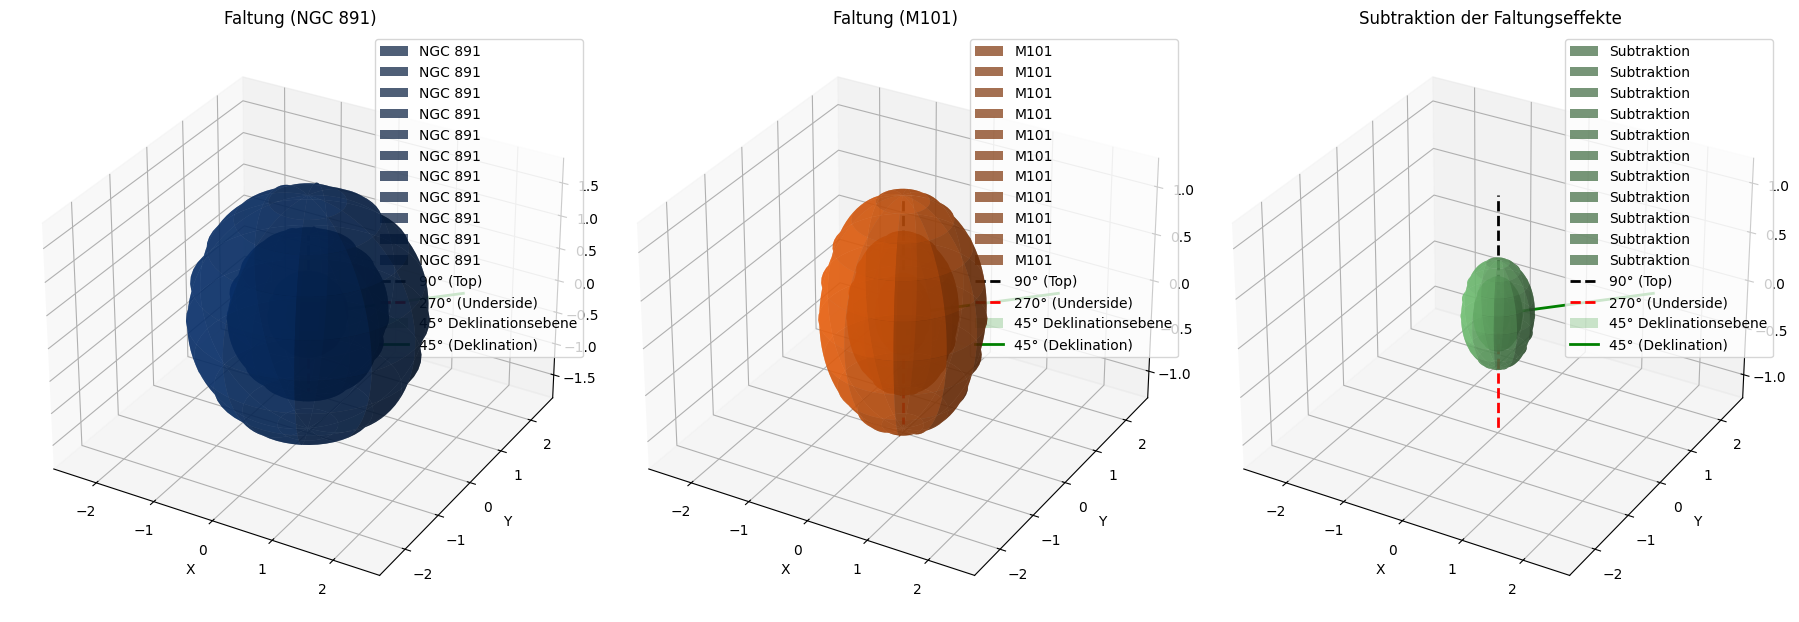

Gamma-Werte und Divergenzen:
NGC 891 (85°): Gamma = 1.797, Divergenz = 0.998
M101 (18°): Gamma = 1.247, Divergenz = 0.655


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameter für die USK (Faltungskugel)
R = 1  # Radius der Kugel
alpha = 0.5  # Faltungsintensität
p = 2  # Projectionsexponent
n_steps = 10  # Anzahl der Faltungsschritte

# Funktion zur Berechnung der Position auf der USK nach n Faltungsschritten
def usk_position(n, theta, phi, gamma):
    xi = 1 / (1 + alpha * n**p) * gamma  # Gamma-Wert beeinflusst die Faltungstiefe
    r = R * xi
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

# RVT-Boost-Faktor als Funktion des Inklinationswinkels i
def rvt_boost(i_deg):
    i_rad = np.radians(i_deg)
    return 1 + 0.8 * np.sin(i_rad)

# Normalisierte Projektiondivergenz D_norm als Funktion des Inklinationswinkels i
def norm_divergence(i_deg):
    gamma_i = rvt_boost(i_deg)
    gamma_270 = rvt_boost(270)
    gamma_90 = rvt_boost(90)
    return abs(gamma_i - gamma_270) / abs(gamma_90 - gamma_270)

# Erzeuge eine Kugeloberfläche für verschiedene Faltungsschritte
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta_grid, phi_grid = np.meshgrid(theta, phi)

# Berechnung der Gamma-Werte und Divergenzen für NGC 891 und M101
inclination_ngc891 = 85
inclination_m101 = 18

gamma_ngc891 = rvt_boost(inclination_ngc891)
gamma_m101 = rvt_boost(inclination_m101)

divergence_ngc891 = norm_divergence(inclination_ngc891)
divergence_m101 = norm_divergence(inclination_m101)

# Erstelle eine 3D-Figur mit drei Subplots
fig = plt.figure(figsize=(18, 12))

# Subplot 1: Faltung für NGC 891
ax1 = fig.add_subplot(131, projection='3d')
for n in range(n_steps + 1):
    x, y, z = usk_position(n, theta_grid, phi_grid, gamma_ngc891)
    ax1.plot_surface(x, y, z, alpha=0.7, color=plt.cm.Blues(divergence_ngc891), rstride=5, cstride=5, label=f'NGC 891')
ax1.set_title('Faltung (NGC 891)')

# Subplot 2: Faltung für M101
ax2 = fig.add_subplot(132, projection='3d')
for n in range(n_steps + 1):
    x, y, z = usk_position(n, theta_grid, phi_grid, gamma_m101)
    ax2.plot_surface(x, y, z, alpha=0.7, color=plt.cm.Oranges(divergence_m101), rstride=5, cstride=5, label=f'M101')
ax2.set_title('Faltung (M101)')

# Subplot 3: Subtraktion der Faltungseffekte von NGC 891 und M101
ax3 = fig.add_subplot(133, projection='3d')
for n in range(n_steps + 1):
    x1, y1, z1 = usk_position(n, theta_grid, phi_grid, gamma_ngc891)
    x2, y2, z2 = usk_position(n, theta_grid, phi_grid, gamma_m101)
    # Subtraktion der Faltungseffekte
    ax3.plot_surface(x1 - x2, y1 - y2, z1 - z2, alpha=0.7, color=plt.cm.Greens(0.5), rstride=5, cstride=5, label=f'Subtraktion')
ax3.set_title('Subtraktion der Faltungseffekte')

# Zeichne die Achsen für die 90°, 270° Projektionen und die 45°-Deklination in allen drei Subplots
max_range = 1.2 * R
for ax in [ax1, ax2, ax3]:
    ax.plot([0, 0], [0, 0], [0, max_range], 'k--', linewidth=2, label='90° (Top)')
    ax.plot([0, 0], [0, 0], [0, -max_range], 'r--', linewidth=2, label='270° (Underside)')

    # Zeichne die 45°-Deklinationsebene
    u = np.linspace(-2 * max_range, 2 * max_range, 2)
    v = np.linspace(-2 * max_range, 2 * max_range, 2)
    x_45 = u
    y_45 = v
    z_45 = np.zeros_like(u)
    ax.plot_surface(np.outer(x_45, np.ones_like(v)), np.outer(y_45, np.ones_like(u)), np.outer(z_45, np.ones_like(u)),
                    alpha=0.2, color='green', label='45° Deklinationsebene')

    # Zeichne die 45°-Deklinationslinie in der xy-Ebene
    ax.plot([0, 2 * max_range * np.cos(np.radians(45))], [0, 2 * max_range * np.sin(np.radians(45))], [0, 0], 'g-', linewidth=2, label='45° (Deklination)')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Ausgabe der Ergebnisse
print("Gamma-Werte und Divergenzen:")
print(f"NGC 891 (85°): Gamma = {gamma_ngc891:.3f}, Divergenz = {divergence_ngc891:.3f}")
print(f"M101 (18°): Gamma = {gamma_m101:.3f}, Divergenz = {divergence_m101:.3f}")
